# Finding Connections: Top 100 and Our Giant Dataset

This notebook follows the process we took to find any relationships between the top 100 and all the other songs we collected, but first we explored the features of the top 100 over the years to see if there were any recognizable patterns in the attributes we collected.

In [62]:
### This block grabs the dataframes for you ###
### This block doesn't need any modification ###

from sqlalchemy import create_engine
from pandas.io import sql
import pandas as pd

hostname=''
dbname=''
uname=''
pwd=''

engine = create_engine("mysql+pymysql://{user}:{pw}@{host}/{db}".format(host=hostname, db=dbname, user=uname, pw=pwd))

top100 = pd.read_sql('SELECT * FROM top100', con=engine)
allSongs = pd.read_sql('SELECT * FROM final_Table', con=engine)

In [63]:
print("----- Top 100 Songs -----")
display(top100.head(3))
print("----- All Songs -----")
display(allSongs.head(3))

----- Top 100 Songs -----


,year,rank,artist,title,album,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,keys,valence,ids
0,1990,1,Wilson Phillips,Hold On,Wilson Phillips,1990-01-01,266866,68,0.679,0.4000,0.657,0.000000,0.0497,-9.897,0.0255,97.800,4.0,5.0,0.546,4VZDv8sASBS8UruUBGTFdk
1,1990,2,Roxette,It Must Have Been Love,It Must Have Been Love,1990-05-20,258786,76,0.520,0.3400,0.652,0.000055,0.2560,-6.655,0.0274,80.609,4.0,5.0,0.722,6kvoHl80mfCVTv7XnZkjQn
2,1990,3,Sinéad O'Connor,Nothing Compares 2 U,I Do Not Want What I Haven't Got,1990-07-01,280040,72,0.511,0.0425,0.574,0.000023,0.1050,-7.016,0.0273,119.917,4.0,5.0,0.161,3nvuPQTw2zuFAVuLsC9IYQ


----- All Songs -----


,ids,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,keys,valence
0,2LKBDF6u2QNrzlUPzvpNAS,Tellin' Me Lies,Nature Of The Beast,April Wine,1981,3.025550,23,0.706,0.0543,0.637,0.000046,0.0616,-11.825,0.0340,137.752,3.0,9,0.965
1,2Y0HDXWfE6KifNzo3GEScQ,Dancer,Hot Space,Queen,1982-05-03,3.818883,25,0.745,0.0435,0.336,0.000009,0.0766,-11.970,0.0398,100.093,4.0,9,0.625
2,2lRETJsdBygk2oVWbPpSRV,In Your Eyes,Emotions In Motion,Billy Squier,1982,3.777333,25,0.526,0.2200,0.558,0.000000,0.0589,-6.918,0.0291,137.122,4.0,2,0.566


 
<hr>


In [64]:
# first lets see if popular taste changes year over year
# clearly music in the 90s sound way different, but
# do the attributes shift?

top100[top100['year']== 1990]

features = ['year',
 'danceability',
 'acousticness',
 'energy',
 'instrumentalness',
 'liveness',
 'loudness',
 'speechiness',
 'tempo',
 'time_signature',
 'keys',
 'valence']

In [65]:
# we first have to get the averages of every year
# so well get 1990 and then make a loop to concat the
# rest on 1990's 

averaged = top100[top100['year']== 1990][features]

In [66]:
averaged = pd.DataFrame(averaged.mean()).transpose()

In [67]:
year = 1991
for i in range(30):
    yearAvg = top100[top100['year']== year + i][features]
    yearAvg = pd.DataFrame(yearAvg.mean()).transpose()
    averaged = pd.concat([averaged,yearAvg],axis=0)

In [68]:
averaged

,year,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,keys,valence
0,1990.0,0.651960,0.162928,0.681150,0.016556,0.162504,-8.909060,0.053324,116.292260,3.990000,5.080000,0.623241
0,1991.0,0.636200,0.180819,0.661500,0.032203,0.165901,-9.540530,0.053245,119.090800,3.980000,4.870000,0.608925
0,1992.0,0.629610,0.176350,0.627950,0.023039,0.178132,-9.214860,0.065150,118.994740,3.970000,5.510000,0.553158
0,1993.0,0.651640,0.185712,0.621680,0.038072,0.178391,-9.538230,0.072445,112.768860,3.970000,5.580000,0.548460
0,1994.0,0.639690,0.231835,0.586666,0.010385,0.176903,-8.860150,0.074084,119.338900,3.940000,5.720000,0.529470
0,1995.0,0.647182,0.202243,0.623990,0.013174,0.161477,-8.302747,0.068764,117.973333,3.939394,5.797980,0.555174
0,1996.0,0.642190,0.233870,0.627460,0.031278,0.167945,-8.020260,0.067748,115.284840,4.000000,5.710000,0.588530
0,1997.0,0.676384,0.239524,0.583195,0.026211,0.161772,-8.341384,0.086048,119.684606,3.959596,5.505051,0.551082
0,1998.0,0.665610,0.224980,0.595123,0.008142,0.174390,-7.765880,0.098260,118.321760,3.930000,5.110000,0.550779
0,1999.0,0.653680,0.198264,0.630924,0.001644,0.153516,-7.143410,0.087713,113.450690,3.980000,5.470000,0.547320


In [114]:
import matplotlib.pyplot as plt
from sklearn import preprocessing

# gonna normalize it so i can display on a 
# single graph
x = averaged.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
normalized = pd.DataFrame(x_scaled)
normalized.columns = features
del normalized['year']
normalized = pd.concat([years,normalized],axis=1)

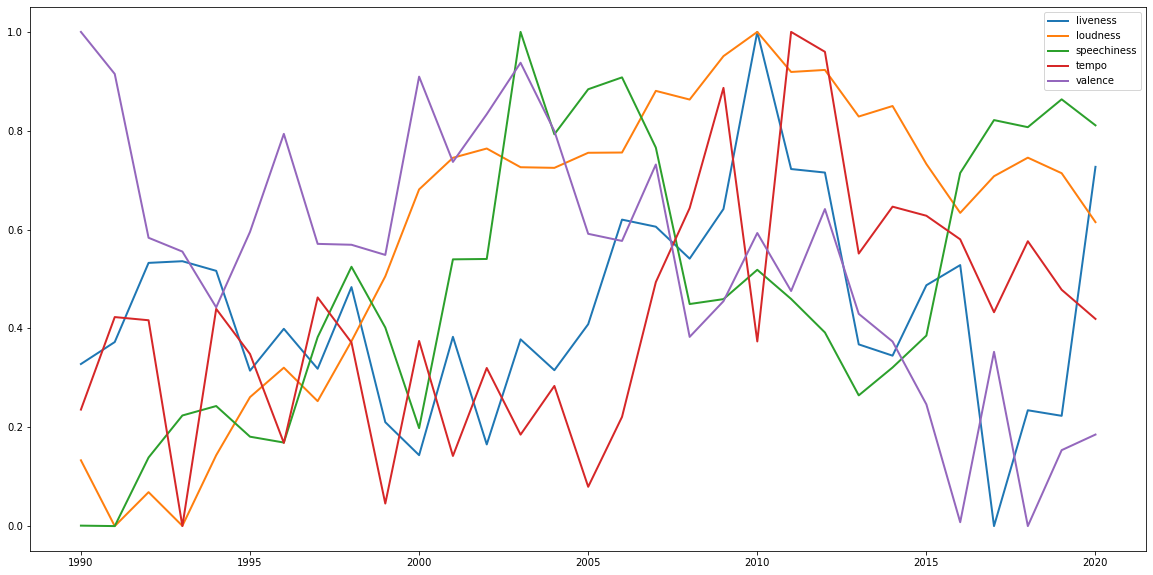

In [115]:
# lets view them together first

plt.figure(figsize=(20,10))
plt.plot( 'year', 'liveness', data=normalized, marker='', linewidth=2)
plt.plot( 'year', 'loudness', data=normalized, marker='', linewidth=2)
plt.plot( 'year', 'speechiness', data=normalized, marker='', linewidth=2)
plt.plot( 'year', 'tempo', data=normalized, marker='', linewidth=2)
plt.plot( 'year', 'valence', data=normalized, marker='', linewidth=2)
plt.legend()
plt.show()

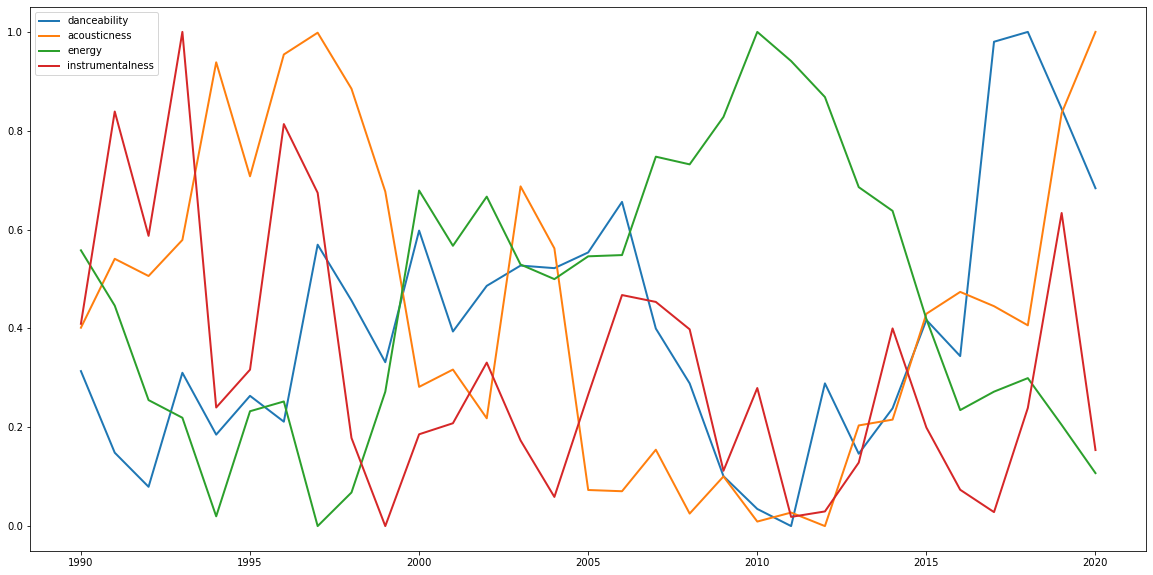

In [109]:
# heres the next because it would look
# like spaghetti if all lines were on one fig

plt.figure(figsize=(20,10))
plt.plot( 'year', 'danceability', data=normalized, marker='', linewidth=2)
plt.plot( 'year', 'acousticness', data=normalized, marker='', linewidth=2)
plt.plot( 'year', 'energy', data=normalized, marker='', linewidth=2)
plt.plot( 'year', 'instrumentalness', data=normalized, marker='', linewidth=2)

plt.legend()
plt.show()

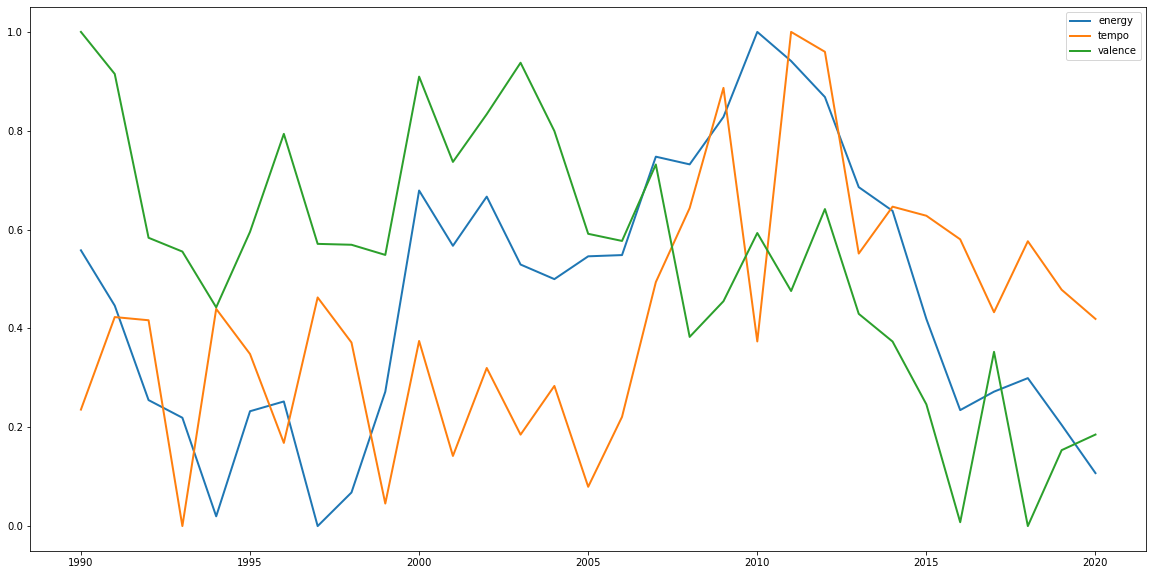

In [118]:
# heres an interesting note, valence, energy and 
# tempo look some what correlated, and tanked the
# last decade, this makes sense because these 
# attributes relates to mood

plt.figure(figsize=(20,10))
plt.plot( 'year', 'energy', data=normalized, marker='', linewidth=2)
plt.plot( 'year', 'tempo', data=normalized, marker='', linewidth=2)
plt.plot( 'year', 'valence', data=normalized, marker='', linewidth=2)
plt.legend()
plt.show()

In [128]:
# lets not take my word for it though, and 
# check if its actually correlated

correlationDF = normalized[['energy','tempo','valence']]

In [127]:
# so it looks to be between a weak
# and moderate correlation, its interesting
# and kind of makes sense that valence and
# tempo are inversly related

correlationDF.corr(method ='pearson') 

,energy,tempo,valence
energy,1.000000,0.390650,0.292206
tempo,0.390650,1.000000,-0.404137
valence,0.292206,-0.404137,1.000000


In [138]:
# okay, aside from music in the 90s being
# happier, it might be good to see if the
# top100 is a good representation of all
# the music made in the respective year

allSongs['year'] = allSongs['release_date'].astype(str).str[:4]

In [141]:
allCompared = allSongs[features]

In [144]:
# we can drop all the songs that arent
# 1990 to 2020

allCompared = allCompared.sort_values(by=['year'])

In [157]:
year = 1990
yearList = []
for i in range(31):
    yearList.append(year+i)

In [ ]:
combinedYears = []
for i in yearList:
    combinedYears.append(allCompared[(allCompared == str(i)).any(axis=1)])

In [162]:
allSongsDF = pd.concat(combinedYears)

In [163]:
# since the previous df was normalized we
# probably should do it for this one too

top100norm = normalized # well save this as a different var for clarity

In [176]:
averaged = allSongsDF[allSongsDF['year']== str(1990)][features]
averaged = pd.DataFrame(averaged.mean()).transpose()
year = 1991
for i in range(30):
    yearAvg = allSongsDF[allSongsDF['year']== str(year + i)][features]
    yearAvg = pd.DataFrame(yearAvg.mean()).transpose()
    averaged = pd.concat([averaged,yearAvg],axis=0)

In [178]:
# its in order so we can delete year for now and normalize
del averaged['year']


In [181]:
cols = ['danceability', 'acousticness', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature',
       'keys', 'valence']

In [183]:
x = averaged.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
normalized = pd.DataFrame(x_scaled)
normalized.columns = cols

In [188]:
allSongsNorm = normalized

In [206]:
#correlation = allSongsNorm.corr(top100norm)

results = []
for i in top100norm.columns:
    print(i + ": " + str(allSongsNorm[i].corr(top100norm[i])))
    results.append([i,allSongsNorm[i].corr(top100norm[i])])
    #print(allSongsNorm.corr[i](top100norm[i]))
    

danceability: 0.5247640077805361
acousticness: 0.3866729032006208
energy: 0.5164470836838522
instrumentalness: -0.35980272488171977
liveness: -0.2854008202397479
loudness: 0.9132747464777894
speechiness: 0.5691061192674568
tempo: 0.6075625800622207
time_signature: 0.14448612428072635
keys: 0.004354087767083963
valence: 0.792905865027465


In [213]:
df = pd.DataFrame(results)
df = df.set_index(0)
df = df.transpose()

(-1.0, 1.0)

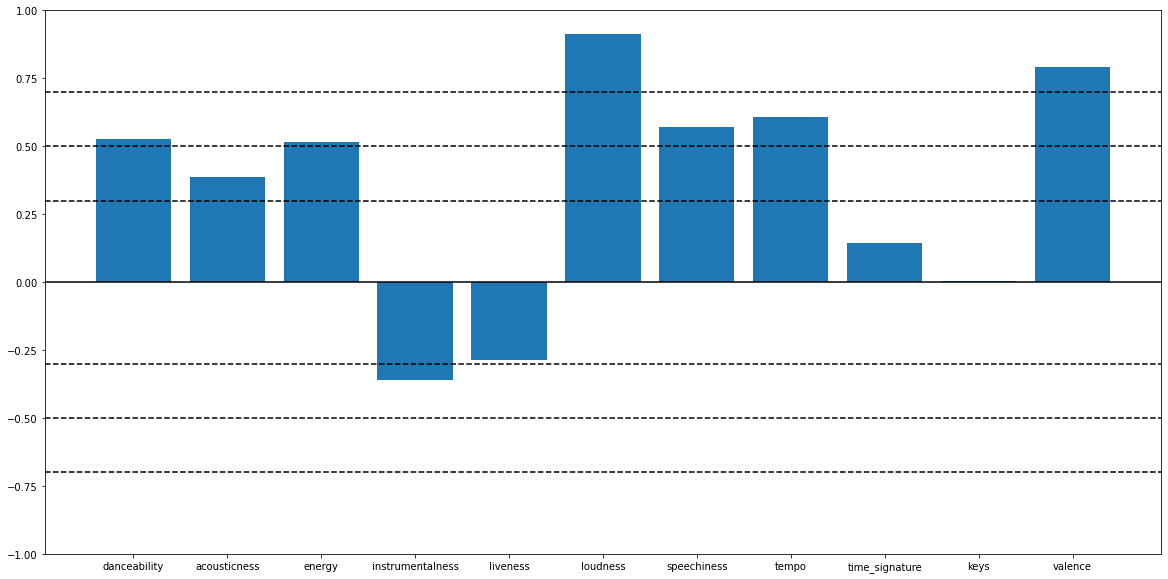

In [235]:
# there's a large correlation with loudness and
# valence. I'm not sure about the reason behind
# valence, but it could be possible that the loudness
# is due to the loudness wars that took place

plt.figure(figsize=(20,10))
plt.bar(df.columns,list(df.iloc[0]))
plt.axhline(y=0.3,color='k',linestyle='--')
plt.axhline(y=0.5,color='k',linestyle='--')
plt.axhline(y=0.7,color='k',linestyle='--')
plt.axhline(y=-0.3,color='k',linestyle='--')
plt.axhline(y=-0.5,color='k',linestyle='--')
plt.axhline(y=-0.7,color='k',linestyle='--')
plt.axhline(y=-0,color='k')
plt.ylim(-1, 1)

In [225]:
list(df.iloc[0])

[0.5247640077805361,
 0.3866729032006208,
 0.5164470836838522,
 -0.35980272488171977,
 -0.2854008202397479,
 0.9132747464777894,
 0.5691061192674568,
 0.6075625800622207,
 0.14448612428072635,
 0.004354087767083963,
 0.792905865027465]